In [2]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir
import numpy as np
from matplotlib import pyplot as plt
import sys
from datetime import datetime
from time import time
import pandas as pd

In [3]:
current = abspath('')
# import utils
root_dir = abspath(join(current, pardir))
if not root_dir in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir

In [5]:
# root data directory
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [6]:
# Combine gaia with others
name = "Combine"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Combine already exist. Good to go!


In [8]:
# load GAIA
name = "GAIA"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/GAIA/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-004-005.hdf5']

In [9]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00004331-8914378,1,222
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K,00012116-8928517,1,111
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,8.2865095,6.5148206,303.10597686099044,-27.824720661451884,5750.4326,5745.2676,5755.3184,4.3541,4.3477,4.3606,-0.2969,-0.3044,-0.2905,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00013429-8917116,1,222
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,-9.221251,6.7962427,303.09523730720935,-27.787137577515743,6268.863,6260.8765,6277.1826,4.2543,4.2417,4.2669,-0.3655,-0.3711,-0.3599,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,00015786-8919312,1,222
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,33.838387,3.4127908,303.27634091220216,-28.469529127008617,6146.648,6133.3306,6160.546,4.2041,4.197,4.2109,-0.5671,-0.5814,-0.5514,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,00003383-8837283,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"29,144,483",359.121617,88.849464,12.791,12.414,AAA,2305490791832146432,4.029614,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,14.046446,14.441862,13.47968,961.65857,1206.7952,0.97922367,1.2132953,-4.4090395,3.7515028,122.62790640386665,26.010265744280915,5864.338,5839.309,5880.9834,3.774,3.7556,3.7845,-0.5563,-0.5779,-0.5458,1395.1606,1381.1881,1421.5767,0.4194,0.4067,0.4284,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23562918+8850580,1,222
"29,144,484",359.476859,88.387932,13.072,12.66,AAA,2304711581685346432,10.118564,9.746954357302645,0.019540144,-2.71702261816708,0.017309012,1.192541824142351,0.015409919,14.306393,14.693643,13.742041,970.5339,1503.4253,0.9179697,1.2155246,-78.52453,4.5883493,122.51842977553947,25.55932221031494,5545.2944,5

In [ ]:
# gaia = (gaia_.filter("parallax > 0")
#                     .filter("e_parallax/parallax < 0.15")
#                     .filter("bpmag - rpmag > -3")
#                     .filter("bpmag - rpmag < 6")
#                     .filter("gmag > 3")
#                     .filter("gmag < 21")
#                     .filter("fb_over_err > 10")
#                     .filter("fr_over_err > 10")
#                     .filter("ruwe < 1.4")
#                     .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
#                     .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
#                     .filter("Jmag < 13.5")
#                     .filter("Jmag > 0")
#                )
# gaia

# RAVE6

In [10]:
# load RAVE
name = "RAVE6"
rave_dir = join(root_data_dir, name)
rave = vaex.open(join(rave_dir, "rave6.hdf5"))
rave

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


In [11]:
a = rave.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
rave = vaex.from_pandas(a)
rave

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


# GALAH

join with rave to rave_galah

In [12]:
name = "GALAH"
galah_dir = join(root_data_dir, name)
galah_files = glob(join(galah_dir, "*.hdf5"))
galah_files.sort()
galah = vaex.open_many(galah_files)
galah

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,4667368899326730240,4553.3545,137.06088556228917,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0.35136763119226394,0.07919326531297675,36.20399856567383,0.18299999833106995
1,4667362989451832320,3622.7446,104.98349008795871,4.6915054,0.19856208380453938,nan,nan,nan,nan,55.373325571289065,0.7317890322419305
2,4667324643983679488,4852.4756,172.75096900138723,2.4668846,0.22319904274460833,-1.1701574,0.18190171456363485,0.27304791329884204,0.0853664789169457,95.87799835205078,0.1509999930858612
3,4667335913977929728,5588.5005,104.29455501889545,3.9993572,0.18612670726590325,0.052394867,0.09937209372391331,-0.015429693609670742,0.05371322433644004,7.130000114440918,0.12600000202655792
4,4667323681911007232,5709.503,109.2033998665521,4.1819053,0.18470374660212685,-0.013732433,0.11137627470861318,0.08102261072159844,0.0803723809132596,24.81599998474121,0.16300000250339508
...,...,...,...,...,...,...,...,...,...,...,...
"588,056",6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"588,057",6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"588,058",6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"588,059",6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [13]:
a = galah.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
galah = vaex.from_pandas(a)
galah["source_id"] = galah["source_id"].astype("int64")
galah

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,4667368899326730240,4553.3545,137.06088556228917,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0.35136763119226394,0.07919326531297675,36.20399856567383,0.18299999833106995
1,4667362989451832320,3622.7446,104.98349008795871,4.6915054,0.19856208380453938,nan,nan,nan,nan,55.373325571289065,0.7317890322419305
2,4667324643983679488,4852.4756,172.75096900138723,2.4668846,0.22319904274460833,-1.1701574,0.18190171456363485,0.27304791329884204,0.0853664789169457,95.87799835205078,0.1509999930858612
3,4667335913977929728,5588.5005,104.29455501889545,3.9993572,0.18612670726590325,0.052394867,0.09937209372391331,-0.015429693609670742,0.05371322433644004,7.130000114440918,0.12600000202655792
4,4667323681911007232,5709.503,109.2033998665521,4.1819053,0.18470374660212685,-0.013732433,0.11137627470861318,0.08102261072159844,0.0803723809132596,24.81599998474121,0.16300000250339508
...,...,...,...,...,...,...,...,...,...,...,...
"588,056",6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"588,057",6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"588,058",6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"588,059",6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [14]:
rave_pandas = rave.to_pandas_df()
galah_pandas = galah.to_pandas_df()
# galah
rave_galah = pd.merge(rave_pandas, galah_pandas, on="source_id", how="outer")
rave_galah = rave_pandas.merge(galah_pandas, on="source_id", how="outer")
rave_galah = vaex.from_pandas(rave_galah)
# rave_galah.sort("source_id")
rave_galah

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,034,208",nan,nan,nan,nan,nan,nan,6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"1,034,209",nan,nan,nan,nan,nan,nan,6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"1,034,210",nan,nan,nan,nan,nan,nan,6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"1,034,211",nan,nan,nan,nan,nan,nan,6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [15]:
len(rave_galah['source_id'].unique()), len(rave_galah)

(1034213, 1034213)

In [16]:
mask = ~rave_galah["rv_galah"].isna() & ~rave_galah["rv_rave"].isna()
mask.sum()

array(4738)

In [17]:
rave_galah.export(join(data_dir, "rave_galah.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.20s =  0.0m =  0.0h
 

# Lamost

prereq: galah and rave

In [18]:
name = "LAMOST"
lamost_dir = join(root_data_dir, name)
lamost_files = glob(join(lamost_dir, "*.hdf5"))
lamost_files.sort()
lamost = vaex.open_many(lamost_files)
lamost

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id
0,F9,5580.10009765625,110.20999908447266,4.593999862670898,0.1770000010728836,-0.01899999938905239,0.11599999666213989,26.200000762939453,9.449999809265137,0.1918340027332306,0.04679799824953079,2676865000324707584
1,G0,5719.72021484375,90.4000015258789,3.9660000801086426,0.14100000262260437,-0.23499999940395355,0.09399999678134918,1.7300000190734863,8.5600004196167,0.15432800352573395,0.050794001668691635,2676120459154270336
2,F6,5931.68994140625,95.66000366210938,4.370999813079834,0.15000000596046448,-1.0290000438690186,0.10000000149011612,15.5600004196167,8.869999885559082,0.189191997051239,0.051621001213788986,2676863969532562688
3,F5,6080.14990234375,39.88999938964844,4.144999980926514,0.05700000002980232,-1.024999976158142,0.035999998450279236,-24.649999618530273,5.5,0.1367579996585846,0.031055999919772148,2676876029800730368
4,F9,5576.39013671875,48.91999816894531,4.090000152587891,0.06700000166893005,0.36800000071525574,0.04600000008940697,-22.690000534057617,6.460000038146973,-0.08894199877977371,0.06206300109624863,2676925576543545856
...,...,...,...,...,...,...,...,...,...,...,...,...
"2,730,468",F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549,1822777905628141696
"2,730,469",F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175,1822773851178836608
"2,730,470",G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361,1822606450533050880
"2,730,471",G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885,1822593668710339328


In [19]:
a = lamost.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
lamost = vaex.from_pandas(a)
lamost

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id
0,F9,5580.10009765625,110.20999908447266,4.593999862670898,0.1770000010728836,-0.01899999938905239,0.11599999666213989,26.200000762939453,9.449999809265137,0.1918340027332306,0.04679799824953079,2676865000324707584
1,G0,5719.72021484375,90.4000015258789,3.9660000801086426,0.14100000262260437,-0.23499999940395355,0.09399999678134918,1.7300000190734863,8.5600004196167,0.15432800352573395,0.050794001668691635,2676120459154270336
2,F6,5931.68994140625,95.66000366210938,4.370999813079834,0.15000000596046448,-1.0290000438690186,0.10000000149011612,15.5600004196167,8.869999885559082,0.189191997051239,0.051621001213788986,2676863969532562688
3,F5,6080.14990234375,39.88999938964844,4.144999980926514,0.05700000002980232,-1.024999976158142,0.035999998450279236,-24.649999618530273,5.5,0.1367579996585846,0.031055999919772148,2676876029800730368
4,F9,5576.39013671875,48.91999816894531,4.090000152587891,0.06700000166893005,0.36800000071525574,0.04600000008940697,-22.690000534057617,6.460000038146973,-0.08894199877977371,0.06206300109624863,2676925576543545856
...,...,...,...,...,...,...,...,...,...,...,...,...
"2,730,468",F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549,1822777905628141696
"2,730,469",F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175,1822773851178836608
"2,730,470",G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361,1822606450533050880
"2,730,471",G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885,1822593668710339328


In [21]:
rave_galah_pandas = rave_galah.to_pandas_df()
lamost_pandas = lamost.to_pandas_df()
rave_galah_lamost = rave_galah_pandas.merge(lamost_pandas, on="source_id", how="outer")
rave_galah_lamost = vaex.from_pandas(rave_galah_lamost)
rave_galah_lamost

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,741,833",nan,nan,nan,nan,nan,nan,1822777905628141696,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549
"3,741,834",nan,nan,nan,nan,nan,nan,1822773851178836608,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175
"3,741,835",nan,nan,nan,nan,nan,nan,1822606450533050880,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361
"3,741,836",nan,nan,nan,nan,nan,nan,1822593668710339328,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885


In [22]:
len(rave_galah_lamost['source_id'].unique()), len(rave_galah_lamost)

(3741838, 3741838)

In [23]:
rave_galah_mask = ~rave_galah_lamost["rv_galah"].isna() & ~rave_galah_lamost["rv_rave"].isna()
rave_galah_mask.sum()

array(4738)

In [24]:
rave_lamost_mask = ~rave_galah_lamost["rv_lamost"].isna() & ~rave_galah_lamost["rv_rave"].isna()
rave_lamost_mask.sum()

array(6707)

In [25]:
galah_lamost_mask = ~rave_galah_lamost["rv_lamost"].isna() & ~rave_galah_lamost["rv_galah"].isna()
galah_lamost_mask.sum()

array(16027)

In [26]:
rave_galah_lamost_mask = ~rave_galah_lamost["rv_lamost"].isna() & ~rave_galah_lamost["rv_galah"].isna() & ~rave_galah_lamost["rv_rave"].isna()
rave_galah_lamost_mask.sum()

array(121)

In [27]:
rave_galah_lamost.export(join(data_dir, "rave_galah_lamost.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     1.40s =  0.0m =  0.0h
 

# Apogee
prereq: rave + galah + lamost

In [28]:
name = "APOGEE-2"
apogee_dir = join(root_data_dir, name)
apogee_files = glob(join(apogee_dir, "*.hdf5"))
apogee_files.sort()
apogee = vaex.open_many(apogee_files)
apogee

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"573,728",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"573,729",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"573,730",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"573,731",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [29]:
a = apogee.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
apogee = vaex.from_pandas(a)
apogee

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"573,728",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"573,729",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"573,730",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"573,731",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [30]:
rave_galah_lamost_pandas = rave_galah_lamost.to_pandas_df()
apogee_pandas = apogee.to_pandas_df()

In [31]:
rave_galah_lamost_apogee = rave_galah_lamost_pandas.merge(apogee_pandas, on="source_id", how="outer")
rave_galah_lamost_apogee = vaex.from_pandas(rave_galah_lamost_apogee)
rave_galah_lamost_apogee

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.2258685,0.06654531,6777.5244,65.69732,4.015276,0.027112925,-0.16975,0.007251,0.0423663,0.012838355,-0.16284,0.0052374965
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.7958329,0.026343066,5072.4062,18.283386,4.5154133,0.022440908,-0.067434,0.0071691154,0.0400163,0.08909994,-0.068091,0.0076750424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,210,531",nan,nan,nan,nan,nan,nan,2772000518796992640,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-5.9921446,0.055209246,5315.2563,33.93965,4.538214,0.03211079,0.019167,0.009888026,-0.0513457,0.010251724,0.023937,0.010799623
"4,210,532",nan,nan,nan,nan,nan,nan,6379920759951899648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"4,210,533",nan,nan,nan,nan,nan,nan,1998097371124974720,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"4,210,534",nan,nan,nan,nan,nan,nan,1994741318040223232,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254


In [32]:
len(rave_galah_lamost_apogee['source_id'].unique()), len(rave_galah_lamost_apogee)

(4210536, 4210536)

split into multiple files

In [33]:
combine_dir = join(data_dir, "combine")
safe_mkdir(combine_dir)

Creating /home2/s20321005/Thesis-Project/Data/Combine/combine dir in Data dir


In [34]:
columns = rave_galah_lamost_apogee.column_names
for i1, i2, chunk in rave_galah_lamost_apogee.evaluate_iterator(columns, chunk_size=500_000):
    print(i1, i2)
    df_dict = {}
    for c, k in zip(chunk, columns):
        df_dict[k] = c
    df = vaex_df = vaex.from_dict(df_dict)
    df.export(join(combine_dir, f"combine_{i1}_{i2}.hdf5"), progress=True)

0 500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.50s =  0.0m =  0.0h 
 500000 1000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.30s =  0.0m =  0.0h
 1000000 1500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.35s =  0.0m =  0.0h
 1500000 2000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.31s =  0.0m =  0.0h
 2000000 2500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.37s =  0.0m =  0.0h
 2500000 3000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.33s =  0.0m =  0.0h 
 3000000 3500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.34s =  0.0m =  0.0h
 3500000 4000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.34s =  0.0m =  0.0h
 4000000 4210536
export

# Combine with Gaia

In [35]:
combine_gaia_dir = join(data_dir, "combine_gaia")
safe_mkdir(combine_gaia_dir)

Creating /home2/s20321005/Thesis-Project/Data/Combine/combine_gaia dir in Data dir


In [36]:
rave_galah_lamost_apogee_pandas = rave_galah_lamost_apogee.to_pandas_df()
rave_galah_lamost_apogee_pandas

,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,...,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,-37.893002,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.044000,6.539,8286.0,4.91,0.39,0.00,4973250147957768832,NaN,NaN,NaN,...,6777.524414,65.697319,4.015276,0.027113,-0.169750,0.007251,0.042366,0.012838,-0.162840,0.005237
2,-2.564000,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77.836998,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.519000,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,NaN,NaN,NaN,...,5072.406250,18.283386,4.515413,0.022441,-0.067434,0.007169,0.040016,0.089100,-0.068091,0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210531,NaN,NaN,NaN,NaN,NaN,NaN,2772000518796992640,NaN,NaN,NaN,...,5315.256348,33.939651,4.538214,0.032111,0.019167,0.009888,-0.051346,0.010252,0.023937,0.010800
4210532,NaN,NaN,NaN,NaN,NaN,NaN,6379920759951899648,NaN,NaN,NaN,...,4487.380859,18.906090,1.060154,0.070980,-1.278400,0.020432,-0.025169,0.024307,-1.255100,0.022141
4210533,NaN,NaN,NaN,NaN,NaN,NaN,1998097371124974720,NaN,NaN,NaN,...,4859.908691,9.050734,2.480687,0.024013,-0.229250,0.006350,0.065434,0.006152,-0.236560,0.007337
4210534,NaN,NaN,NaN,NaN,NaN,NaN,1994741318040223232,NaN,NaN,NaN,...,4585.409668,11.298859,2.571437,0.028686,0.119920,0.009225,0.037709,0.007182,0.114820,0.011620


In [38]:
rave_galah_lamost_apogee

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.2258685,0.06654531,6777.5244,65.69732,4.015276,0.027112925,-0.16975,0.007251,0.0423663,0.012838355,-0.16284,0.0052374965
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.7958329,0.026343066,5072.4062,18.283386,4.5154133,0.022440908,-0.067434,0.0071691154,0.0400163,0.08909994,-0.068091,0.0076750424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,210,531",nan,nan,nan,nan,nan,nan,2772000518796992640,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-5.9921446,0.055209246,5315.2563,33.93965,4.538214,0.03211079,0.019167,0.009888026,-0.0513457,0.010251724,0.023937,0.010799623
"4,210,532",nan,nan,nan,nan,nan,nan,6379920759951899648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"4,210,533",nan,nan,nan,nan,nan,nan,1998097371124974720,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"4,210,534",nan,nan,nan,nan,nan,nan,1994741318040223232,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254


In [37]:
# Join with apogee
cols = apogee.column_names
for file in gaia_files:
    t0 = time()
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    # gaia_clean = vaex.from_pandas(gaia_pandas)
    # join_gaia = gaia_clean.join(rave_galah_lamost_apogee, on="source_id", how="left")
    join_gaia = pd.merge(gaia_pandas, rave_galah_lamost_apogee_pandas, on="source_id", how="left")
    join_gaia = vaex.from_pandas(join_gaia)
    for col in cols:
        if col == "source_id": continue
        join_gaia[col] = join_gaia[col].to_pandas_series().to_numpy() # Do this to make np.nan value to no value
    name = file.split('/')[-1]
    # join_gaia.export(join(combine_gaia_dir, name), progress=True) # save if necessary
    t1 = time()
    print(f"saved {name} | {len(join_gaia)} | {datetime.now()} | {t1-t0:.2f} s")
    break
# sneak peek
join_gaia

saved gaia-000-001.hdf5 | 42259 | 2023-07-07 19:54:19.572757 | 10.64 s


#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00004331-8914378,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K,00012116-8928517,1,111,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,8.2865095,6.5148206,303.10597686099044,-27.824720661451884,5750.4326,5745.2676,5755.3184,4.3541,4.3477,4.3606,-0.2969,-0.3044,-0.2905,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00013429-8917116,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,-9.221251,6.7962427,303.09523730720935,-27.787137577515743,6268.863,6260.8765,6277.1826,4.2543,4.2417,4.2669,-0.3655,-0.3711,-0.3599,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,00015786-8919312,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,33.838387,3.4127908,303.27634091220216,-28.469529127008617,6146.648,6133.3306,6160.546,4.2041,4.197,4.2109,-0.5671,-0.5814,-0.5514,858.9404,850.0156,867.

In [44]:
# Join with apogee
cols = apogee.column_names
for file in gaia_files:
    t0 = time()
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    gaia_clean = vaex.from_pandas(gaia_pandas)
    join_gaia = gaia_clean.join(rave_galah_lamost_apogee, on="source_id", how="left")
    name = file.split('/')[-1]
    join_gaia = join_gaia.to_pandas_df()
    join_gaia = vaex.from_pandas(join_gaia)
    join_gaia.export(join(combine_gaia_dir, name), progress=True) # save if necessary
    t1 = time()
    print(f"saved {name} | {len(join_gaia)} | {datetime.now()} | {t1-t0:.2f} s")
    # break
# sneak peek
join_gaia

export(hdf5) [############################------------] 70.88% estimated time:     0.22s =  0.0m =  0.0h 

export(hdf5) [########################################] 100.00% elapsed time  :     0.64s =  0.0m =  0.0h  
 saved gaia-000-001.hdf5 | 42259 | 2023-07-07 19:57:28.402469 | 1.78 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.62s =  0.0m =  0.0h 
 saved gaia-001-002.hdf5 | 41855 | 2023-07-07 19:57:30.178911 | 1.78 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.69s =  0.0m =  0.0h  
 saved gaia-002-003.hdf5 | 40565 | 2023-07-07 19:57:32.535091 | 2.36 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.64s =  0.0m =  0.0h 
 saved gaia-003-004.hdf5 | 40167 | 2023-07-07 19:57:34.639232 | 2.10 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.62s =  0.0m =  0.0h  
 saved gaia-004-005.hdf5 | 39975 | 2023-07-07 19:57:36.667975 | 2.03 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.61s =  0.0m =  0.0h 


#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,359.197673,-89.474236,12.984,12.515,AAA,6341106247145864192,2.1637506,-0.28364569025185976,0.015046449,2.1450785714295253,0.015701974,1.0190951201688359,0.01371227,14.296198,14.72302,13.696558,700.1737,699.5137,1.0162401,1.22074,8.857942,6.204644,303.0720608225402,-27.639054940686016,5768.1924,5746.9077,5781.7803,4.0546,4.0386,4.0687,-0.3619,-0.3787,-0.348,992.042,976.018,1007.1816,0.4224,0.4129,0.4283,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23564744-8928272,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,359.348173,-89.053009,13.307,12.945,AAA,6341217950655102848,1.5533597,-0.47251260931759165,0.026276534,-1.4797494579065331,0.02079026,0.5743186220505488,0.017227173,14.593659,14.980516,14.033916,749.6103,1300.1835,1.0025918,1.2127099,62.051273,8.222315,303.1826826461763,-28.04879547717833,5690.552,5672.9004,5707.9634,4.0648,4.0566,4.0726,-0.6812,-0.7017,-0.6625,1461.9796,1435.8033,1489.4998,0.2952,0.2859,0.3044,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23572356-8903108,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,359.733606,-89.062065,12.676,12.189,AAA,6341217847575888640,11.499268,11.350077713014269,0.02102051,1.8463210725828383,0.01658601,1.6000232255112057,0.013837926,13.979461,14.428928,13.369254,1022.7145,2021.0858,0.992757,1.2177873,-14.799017,3.0645275,303.17316762038894,-28.041469491933153,5249.8413,5201.954,5295.2095,4.3511,4.3325,4.363,-0.095,-0.1388,-0.0464,616.0235,609.1616,628.8472,0.1932,0.1624,0.2195,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23585606-8903434,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,359.056727,-88.750359,12.964,12.57,AAA,6341247018993721984,5.0053473,4.903486948527943,0.01509401,1.004647899366386,0.016945133,0.7396490917262621,0.014090385,14.20839,14.603128,13.646724,1289.3406,1484.8617,1.0068202,1.2102869,15.164808,7.6442347,303.2706201607823,-28.341386168908638,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,23561361-8845012,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,359.233606,-88.75296,12.137,11.68,AAA,6341246950274245632,17.227442,17.127024694589473,0.01188792,1.8573534480699563,0.012567428,2.2335817333943186,0.010794495,13.358074,13.750389,12.799322,1184.8829,2186.8552,1.0227789,1.2095212,-11.014368,2.3281074,303.2656111884644,-28.33981089707305,5627.28,5621.009,5640.5483,4.4091,4.4049,4.413,-0.1841,-0.1911,-0.1722,436.8472,434.3726,441.0184,0.2367,0.2332,0.2438,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,235

# Inspect

In [45]:
#quick look
quick = vaex.open_many(glob(join(combine_gaia_dir, "*.hdf5")))
quick

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.15519,-89.531815,11.418,10.704,AAA,5764635393079767296,11.202992,-8.352078761712255,0.012033119,-7.466580849038771,0.012214055,0.43047135125671315,0.011004682,13.174702,13.789571,12.425439,1228.2557,2930.1003,0.99114627,1.250944,67.09427,0.9067575,303.1640199013711,-26.708320393143175,4718.7,4713.292,4724.818,2.5833,2.5655,2.6014,-0.1946,-0.1952,-0.1941,2070.6995,2031.6134,2112.0928,0.3619,0.3574,0.3668,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,14363724-8931545,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.158806,-89.413895,11.663,11.294,AAA,5764640100363957504,17.092428,-15.001155516411039,0.012871818,-8.19246106070145,0.015000838,1.1756548246142724,0.013411725,12.782229,13.126454,12.259919,2108.8503,2770.0098,1.1272085,1.2091599,-44.15717,4.249649,303.2222502636439,-26.60253359940945,5956.387,5928.9277,5977.1416,3.7695,3.7597,3.7775,-0.5645,-0.585,-0.5521,867.1803,861.9395,874.5553,0.2911,0.2763,0.3022,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,14363811-8924500,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.247148,-89.488724,13.026,12.512,AAA,5764638554175708672,11.671728,-10.811040433849826,0.017244274,-4.3989353543881675,0.01951931,1.9674662903618854,0.01660323,14.446186,14.915824,13.815229,914.79407,1357.1978,0.9770324,1.2232119,13.169717,3.8980281,303.1861500960215,-26.669990195169934,5226.577,5217.9365,5235.52,4.5456,4.5418,4.5518,-0.1967,-0.2063,-0.1864,490.8246,487.5747,493.967,0.2623,0.2565,0.2679,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,14365931-8929194,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.781174,-89.569244,9.953,9.683,AAA,5764635079544432128,7.510926,1.5220681400491376,0.021005264,-7.355087608746858,0.020949371,2.877481398679552,0.018422326,10.847249,11.118501,10.412085,2177.0447,4133.433,1.3881594,1.1933558,-5.286206,0.73470575,303.150290423574,-26.744015581943707,6141.639,6130.1123,6152.07,4.043,4.0398,4.0469,-0.4365,-0.4457,-0.4269,344.0585,341.9788,346.0511,0.0799,0.0745,0.0847,-0.26,-0.32,-0.22,0.33,0.26,0.4,nan,nan,nan,F,14390748-8934092,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.801943,-89.006889,12.509,11.912,AAA,5764731359829174400,11.346082,-10.54234747031648,0.016789988,-4.1943390093826975,0.015902767,0.2086716186891874,0.014617706,14.17896,14.733065,13.476229,735.02185,2048.8267,1.051371,1.2394285,42.34929,3.1309774,303.43352796578637,-26.242058683093564,5244.1147,5202.4478,5301.4165,3.1862,3.0736,3.2597,-0.1073,-0.1138,-0.1047,2680.891,2446.65

In [50]:
(~quick['feh_apogee'].isnan()).sum()

array(372671)

In [51]:
gaia_filt = quick.filter("1000/parallax < 100").filter("parallax > 0")
gaia_filt = gaia_filt.extract()
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.965693,-84.528969,11.068,10.234,AAA,5769828833174725248,81.123276,-53.63942343887564,0.012986213,-60.85883600521474,0.0119863,10.39788020340599,0.010772693,13.329207,14.329933,12.337844,879.43427,2422.9194,1.102427,1.3374778,14.831162,0.7361637,305.6215177010728,-22.23308767968596,3947.6423,3923.8323,3950.3564,4.6856,4.6785,4.6879,0.0662,0.0282,0.0719,95.9626,95.7603,96.1932,0.4064,0.3856,0.41,0.03,-0.18,0.14,0.08,0.05,0.13,nan,nan,nan,M,14395176-8431442,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.600874,-82.008896,12.86,12.043,AAA,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,149.08289,466.4711,1.0189645,1.4594738,nan,nan,306.7474272751045,-19.941902489035343,3352.6963,3349.7727,3354.2317,4.9525,4.9469,4.9541,-0.2125,-0.2224,-0.2083,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,14382420-8200320,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.710147,-81.040672,9.935,9.111,AAA,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,1428.421,3622.4885,1.1233157,1.3228828,31.392872,0.69360477,307.20050347040893,-19.07307318560627,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.73,-0.78,-0.67,0.24,0.2,0.26,nan,nan,nan,M,14385043-8102264,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.837453,-80.02639,12.885,11.998,AAA,5773405029105144832,200.75072,-178.32280147852734,0.038761083,-92.20535150640204,0.040658746,13.491413470912349,0.033533197,15.914625,17.612999,14.668357,107.97156,937.94104,1.1287898,1.4782825,nan,nan,307.67418432021003,-18.163236831591725,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,14392098-8001350,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.896892,-80.810722,11.604,10.749,AAA,5772759096086560640,118.63382,-112.00331916232622,0.020318955,-39.10550497442592,0.025709374,19.005873507193883,0.021113206,14.633487,16.327133,13.383645,187.42296,623.6029,1.1702267,1.4833179,11.748135,4.937303,307.33143203469564,-18.876867410240465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,14393525-8048385,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [52]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.965693,-84.528969,11.068,10.234,AAA,5769828833174725248,81.123276,-53.63942343887564,0.012986213,-60.85883600521474,0.0119863,10.39788020340599,0.010772693,13.329207,14.329933,12.337844,879.43427,2422.9194,1.102427,1.3374778,14.831162,0.7361637,2.1925090952360575,-0.38804058289510635,3947.6423,3923.8323,3950.3564,4.6856,4.6785,4.6879,0.0662,0.0282,0.0719,95.9626,95.7603,96.1932,0.4064,0.3856,0.41,0.03,-0.18,0.14,0.08,0.05,0.13,nan,nan,nan,M,14395176-8431442,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.600874,-82.008896,12.86,12.043,AAA,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,149.08289,466.4711,1.0189645,1.4594738,nan,nan,2.2121599243826378,-0.3480518575453191,3352.6963,3349.7727,3354.2317,4.9525,4.9469,4.9541,-0.2125,-0.2224,-0.2083,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,14382420-8200320,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.710147,-81.040672,9.935,9.111,AAA,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,1428.421,3622.4885,1.1233157,1.3228828,31.392872,0.69360477,2.2200675957531093,-0.33288792556267294,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.73,-0.78,-0.67,0.24,0.2,0.26,nan,nan,nan,M,14385043-8102264,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.837453,-80.02639,12.885,11.998,AAA,5773405029105144832,200.75072,-178.32280147852734,0.038761083,-92.20535150640204,0.040658746,13.491413470912349,0.033533197,15.914625,17.612999,14.668357,107.97156,937.94104,1.1287898,1.4782825,nan,nan,2.2283348861857837,-0.31700828553077837,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,14392098-8001350,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.896892,-80.810722,11.604,10.749,AAA,5772759096086560640,118.63382,-112.00331916232622,0.020318955,-39.10550497442592,0.025709374,19.005873507193883,0.021113206,14.633487,16.327133,13.383645,187.42296,623.6029,1.1702267,1.4833179,11.748135,4.937303,2.222352730284822,-0.32946348877111126,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,14393525-8048385,1,222,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

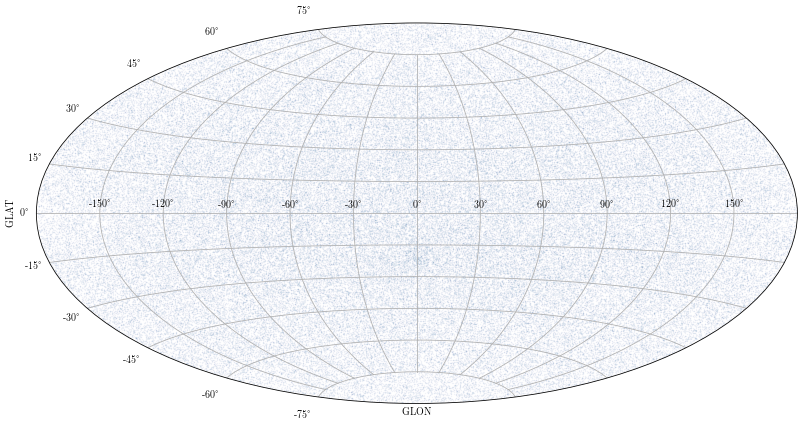

In [53]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=0.1)
plt.grid(True)
plt.show()